## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [3]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
from sklearn.linear_model import LogisticRegression

In [6]:
myData = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')

In [7]:
x = myData[['age','chol']]
y = myData['diagnosis']

In [33]:
logistic_regression_pipeline_1 = Pipeline(
  [
  ("logistic", LogisticRegression())]
)

In [34]:
fitted_log = logistic_regression_pipeline_1.fit(x,y)

fitted_log.named_steps['logistic'].coef_

array([[0.04686331, 0.00180124]])

In [35]:
fitted_log.named_steps['logistic'].intercept_

array([-3.24011226])

In [36]:
(np.log(.9/.1)-fitted_log.named_steps['logistic'].intercept_[0]-fitted_log.named_steps['logistic'].coef_[0][0]*55)/fitted_log.named_steps['logistic'].coef_[0][1]

1587.7158792750995

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [37]:
lda_1 = Pipeline(
  [
  ("linear_dis", LinearDiscriminantAnalysis())]
)

In [38]:
fitted_lda = lda_1.fit(x,y)

fitted_lda.named_steps['linear_dis'].coef_

array([[0.04655744, 0.00178967]])

In [39]:
fitted_log.named_steps['logistic'].intercept_

array([-3.24011226])

In [40]:
(-fitted_lda.named_steps['linear_dis'].intercept_[0]-fitted_lda.named_steps['linear_dis'].coef_[0][0]*55)/fitted_lda.named_steps['linear_dis'].coef_[0][1]

368.235357529938

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [2]:
from sklearn.svm import SVC

In [11]:
SVClassifier = Pipeline([
    ("support_vector_classifier", SVC())
])

degrees = {'support_vector_classifier__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}

gscv = GridSearchCV(SVClassifier, degrees, cv=5, scoring='roc_auc')

gscv_fitted = gscv.fit(x, y)

result_df = pd.DataFrame(data={'SVC_tune': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], "scores": gscv_fitted.cv_results_['mean_test_score']})

max_index = result_df['scores'].idxmax()
row_with_max_value = result_df.loc[max_index]

print(row_with_max_value)

SVC_tune    0.500000
scores      0.606877
Name: 4, dtype: float64


In [21]:
SVClassifier_tuned = Pipeline([
    ("support_vector_classifier", SVC(C=0.5, kernel='linear'))
])
fitted_svc = SVClassifier_tuned.fit(x,y)

In [22]:
coefficients = fitted_svc.named_steps['support_vector_classifier'].coef_
coefficients

array([[0.06442719, 0.00365048]])

In [23]:
(-fitted_svc.named_steps['support_vector_classifier'].intercept_[0]-fitted_svc.named_steps['support_vector_classifier'].coef_[0][0]*55)/fitted_svc.named_steps['support_vector_classifier'].coef_[0][1]

312.7163157558105

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [29]:
from plotnine import ggplot, aes, geom_point, geom_abline


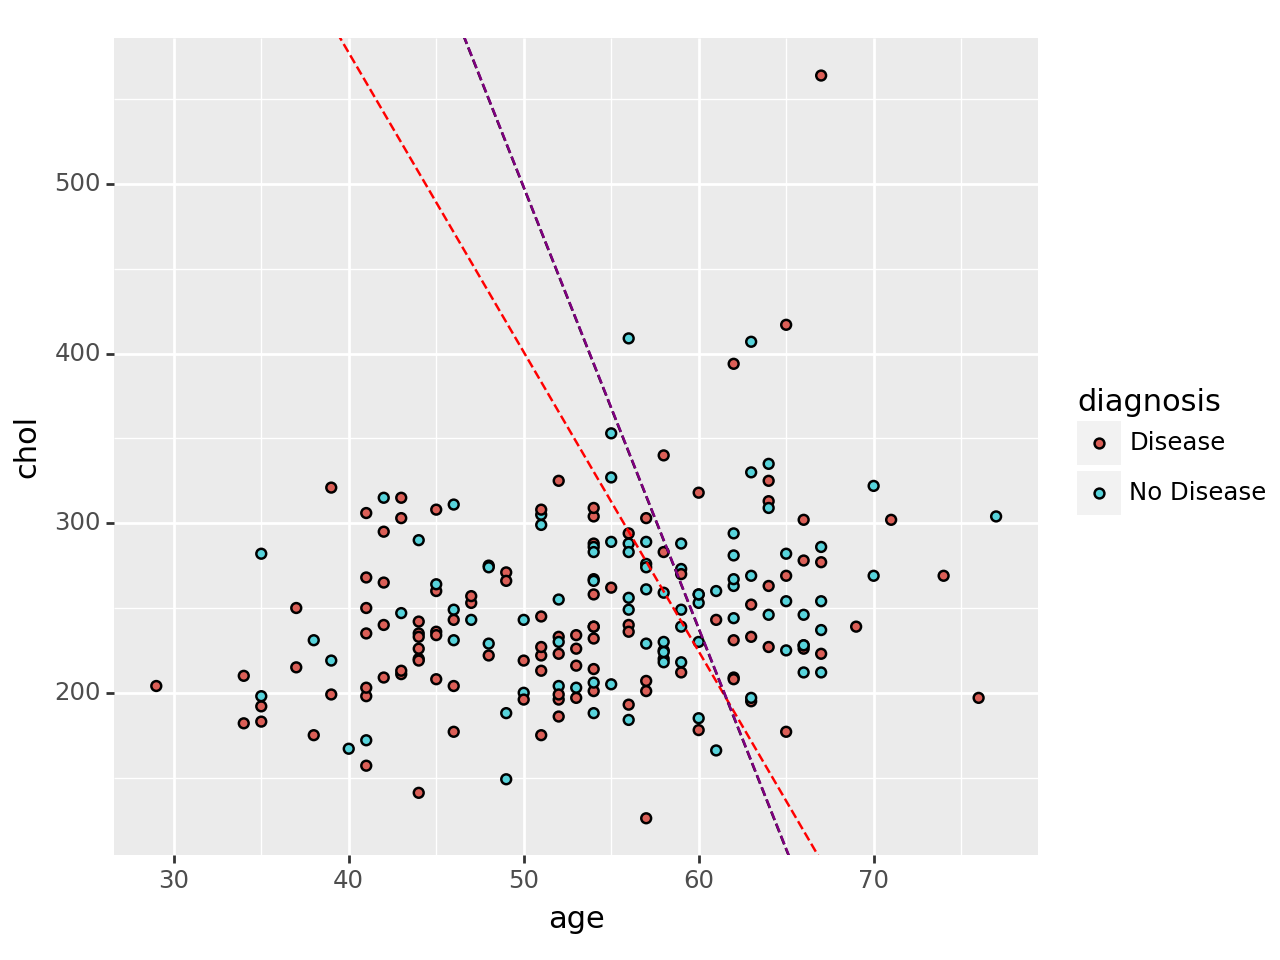

In [46]:
scatter_plot = (
    ggplot() +
    aes(x=myData['age'], y=myData['chol'], fill=myData['diagnosis']) +
    geom_point() +
    geom_abline(
        intercept=-fitted_svc.named_steps['support_vector_classifier'].intercept_ / fitted_svc.named_steps['support_vector_classifier'].coef_[0][1],
        slope=-fitted_svc.named_steps['support_vector_classifier'].coef_[0][0] / fitted_svc.named_steps['support_vector_classifier'].coef_[0][1],
        color='red', linetype='dashed'
    ) +
    geom_abline(
        intercept=-fitted_log.named_steps['logistic'].intercept_/ fitted_log.named_steps['logistic'].coef_[0][1],
        slope=-fitted_log.named_steps['logistic'].coef_[0][0] / fitted_log.named_steps['logistic'].coef_[0][1],
        color='black', linetype='dashed'
    ) +
    geom_abline(
        intercept=-fitted_lda.named_steps['linear_dis'].intercept_ / fitted_lda.named_steps['linear_dis'].coef_[0][1],
        slope=-fitted_lda.named_steps['linear_dis'].coef_[0][0] / fitted_lda.named_steps['linear_dis'].coef_[0][1],
        color='purple', linetype='dashed'
    )
)

print(scatter_plot)
